#SURVIVAL PREDICTION

🙋‍♀️ Author : Sonia firdous

📧 Email: soniafirdous1985@gmail.com

🔗 Data Source :

The data was collected from the following [LINK](https://www.kaggle.com/competitions/titanic/data)

📜 Description:

The Titanic dataset is split into two parts:

Training Set (train.csv)

Contains passenger information along with the outcome (Survived).

Used to train and build machine learning models.

Features include demographic and travel-related attributes such as gender, age, class, and others.

Feature engineering can be applied to create additional useful features (e.g., FamilySize, IsAlone).

Test Set (test.csv)

Contains passenger information without the survival outcome.

Used to evaluate how well the trained model performs on unseen data.

The goal is to predict the survival status of each passenger based on the trained model.

🔍 Purpose of Analysis:

The goal of this analysis is to predict passenger survival on the Titanic using machine learning. By exploring the training data and applying feature engineering, we aim to build models that accurately classify survival and identify the key factors that influenced it.


#IMPORT LIBRARIES

In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [493]:
df=pd.read_csv("/content/train (1).csv")


# DATA EXPLORATION

In [494]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [495]:
df.shape

(891, 12)

In [496]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#VISUALIZE DATA

In [498]:
sns.set_style("whitegrid")     # clean grid background
sns.set_palette("Set2")        # colourful palette
sns.set_context("talk")        # larger fonts for readability
plt.rcParams["figure.figsize"] = (8, 5)



SURVIVAL COUNT

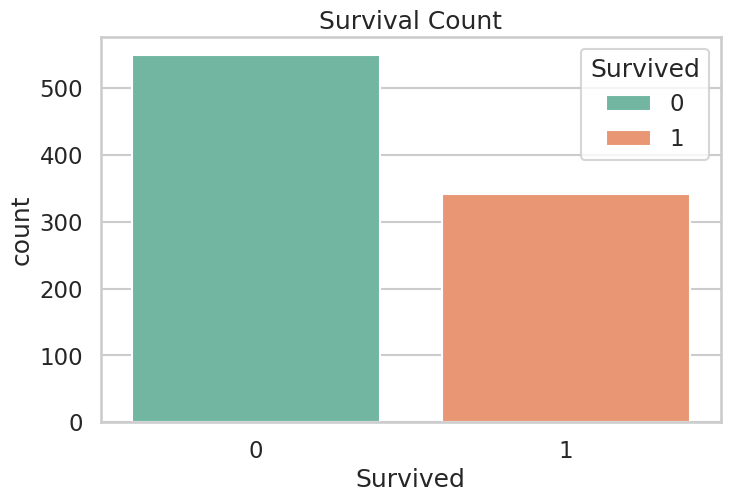

In [499]:
sns.countplot(x="Survived", hue="Survived",data=df)
plt.title("Survival Count")
plt.show()

Survival by Sex

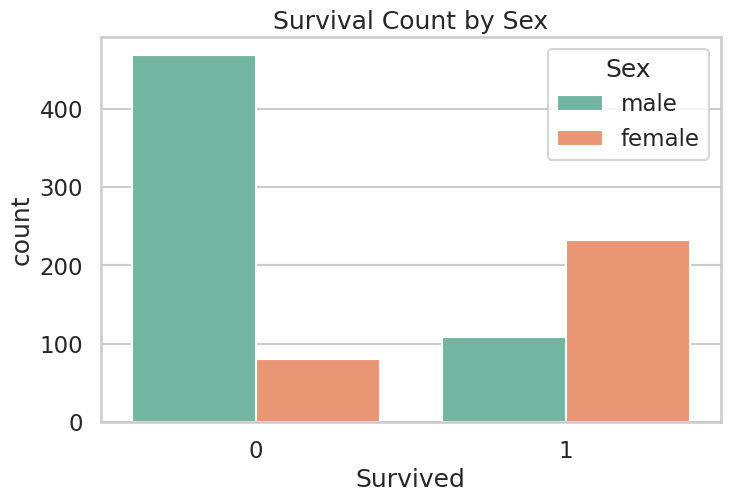

In [500]:
sns.countplot(x="Survived", data=df, hue="Sex",palette="Set2")  # bars split by Sex
plt.title("Survival Count by Sex")
plt.show()


Survival by class

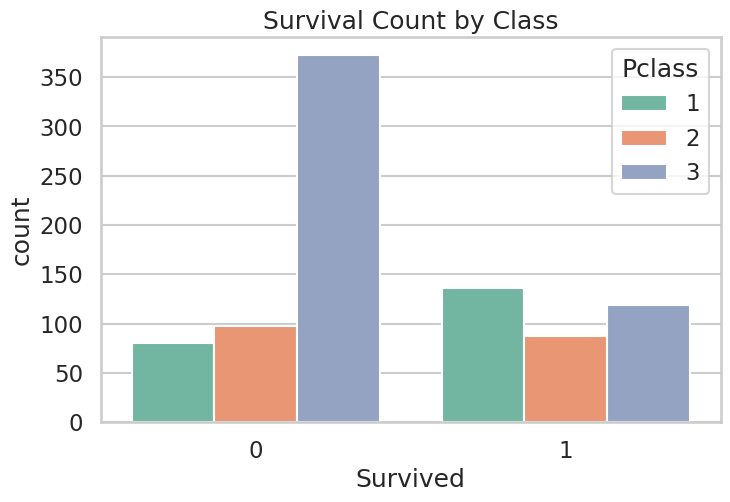

In [501]:
sns.countplot(x="Survived", data=df, hue="Pclass",palette="Set2")
plt.title("Survival Count by Class")
plt.show()

age by survival

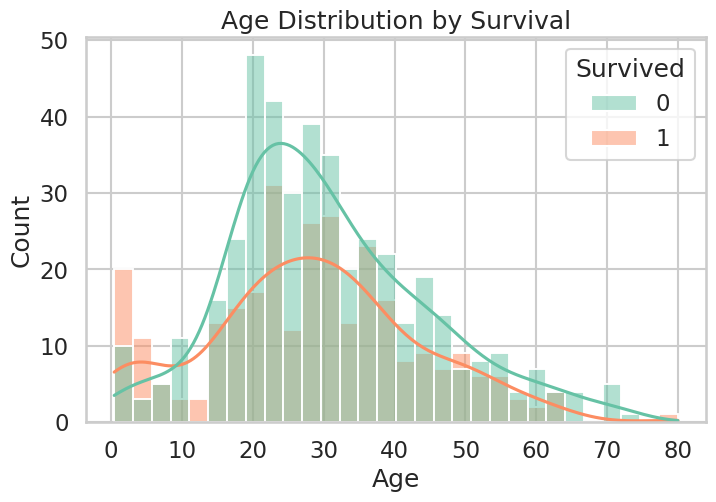

In [502]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


correlation

In [503]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


summary stats

In [504]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


heatmap

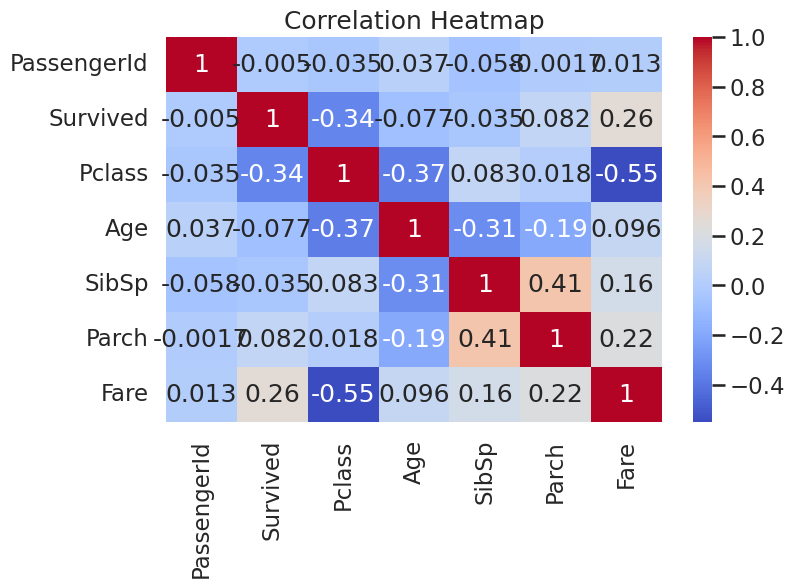

In [505]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#DATA CLEANING

In [506]:
missing=df.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [507]:
missing_percent=df.isnull().sum()/df.shape[0]*100
print(missing_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [508]:
missing_greater_than_20=missing_percent[missing_percent>15]
print(missing_greater_than_20)

Age      19.865320
Cabin    77.104377
dtype: float64


In [509]:
df["Age"].fillna(df["Age"].median(), inplace=True)


/tmp/ipython-input-1567474574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [510]:
df= df.dropna(subset=["Embarked"])


In [511]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# FEATURE ENGINEERING

Drop unused columns

In [512]:
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df.drop(columns=drop_cols, inplace=True)

FamilySize=passenger +SibSp+Parch

In [513]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["Family"] = df["FamilySize"].apply(lambda x: 0 if x == 1 else 1)

If FamilySize == 1 → 0 (alone)

Else (≥2) → 1 (with family)

In [514]:
df.drop(columns=["SibSp", "Parch","FamilySize"], inplace=True)

In [515]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


drop column used to create family


# FEATURE AND TARGET COLUMN

In [516]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [517]:
X

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,0
888,3,female,28.0,23.4500,S,1
889,1,male,26.0,30.0000,C,0


In [518]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


train test split

In [519]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [520]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

Preprocessing + Model Pipeline

In [521]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [522]:
num_features = ["Age", "Fare","Family"]
cat_features = ["Pclass", "Sex", "Embarked"]

In [523]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(), cat_features)
    ]
)

In [524]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# LOGISTIC REGRESSION

In [525]:
LR_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42))
])

In [526]:
LR_model.fit(X_train, y_train)
LR_pred=LR_model.predict(X_test)

#DECISION TREE

In [527]:
DT_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

In [528]:
DT_model.fit(X_train, y_train)
DT_pred=DT_model.predict(X_test)

# RANDOM FOREST

In [529]:
RF_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [530]:
RF_model.fit(X_train, y_train)
RF_pred=RF_model.predict(X_test)

# GRADIENT BOOSTING

In [531]:
GD_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

In [532]:
GD_model.fit(X_train, y_train)
GD_pred=GD_model.predict(X_test)

#XGBoost (Extreme Gradient Boosting)

In [533]:
from xgboost import XGBClassifier

In [534]:
XGB_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(random_state=42))
])

In [535]:
XGB_model.fit(X_train, y_train)
XGB_pred=XGB_model.predict(X_test)

# LightGBM (Light Gradient Boosting Machine)

In [536]:
from lightgbm import LGBMClassifier

In [537]:
LGBM_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(
        random_state=42,
        n_estimators=500
    ))
])

In [538]:
LGBM_model.fit(X_train, y_train)
LGBM_pred=LGBM_model.predict(X_test)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


XGBoost → safer choice if dataset is small to medium and you want stable performance.

LightGBM → best for large datasets with millions of rows, or if training speed is critical.

#EVALUATION

In [539]:
from sklearn.metrics import confusion_matrix

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not Survived", "Survived"],
                yticklabels=["Not Survived", "Survived"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


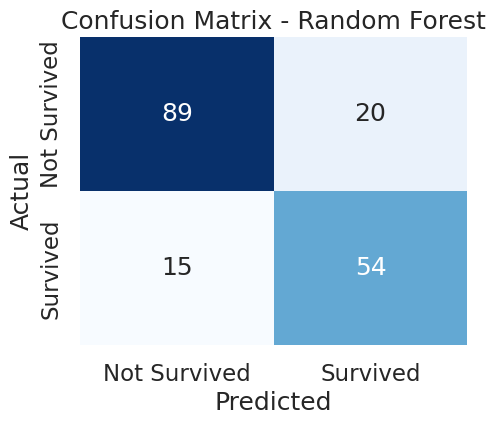

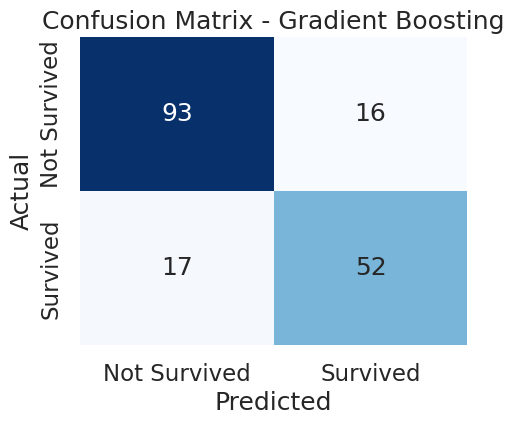

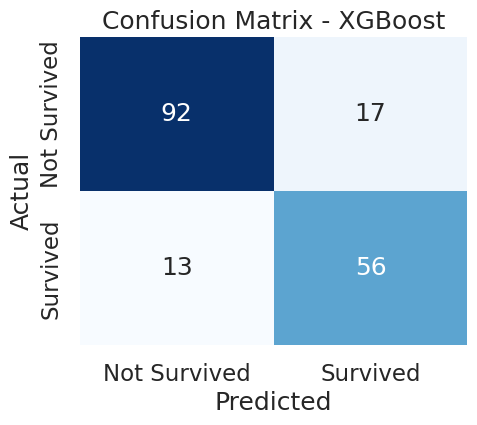

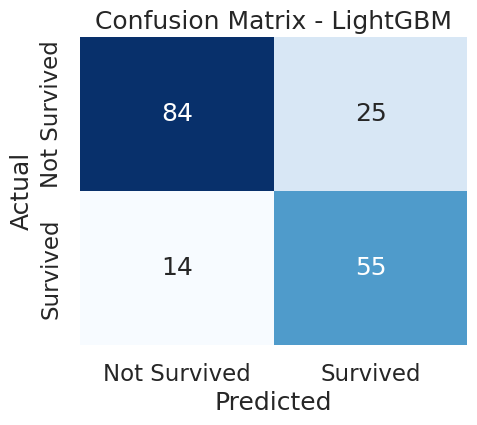

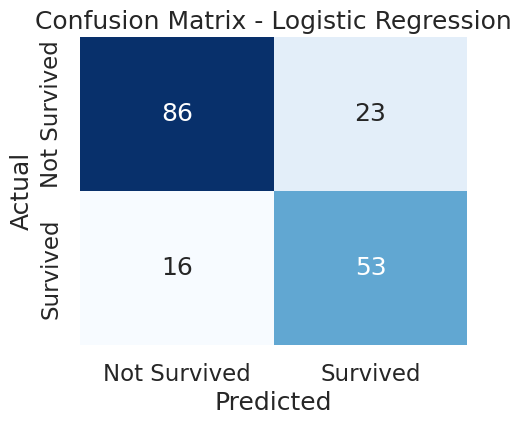

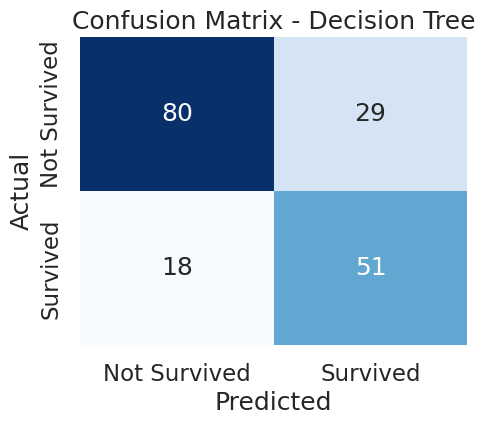

In [540]:
plot_confusion(y_test, RF_pred, "Random Forest")
plot_confusion(y_test, GD_pred, "Gradient Boosting")
plot_confusion(y_test, XGB_pred, "XGBoost")
plot_confusion(y_test, LGBM_pred, "LightGBM")
plot_confusion(y_test, LR_pred, "Logistic Regression")
plot_confusion(y_test, DT_pred, "Decision Tree")


In [541]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---\n")
    print("\nAccuracy:", accuracy_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate(y_test, LR_pred, "Logistic Regression")
evaluate(y_test, DT_pred, "Decision Tree")
evaluate(y_test, RF_pred, "Random Forest")
evaluate(y_test, GD_pred, "Gradient Boosting")
evaluate(y_test, XGB_pred, "XGBoost")
evaluate(y_test, LGBM_pred, "LightGBM")



--- Logistic Regression ---


Accuracy: 0.7808988764044944

Confusion Matrix:
 [[86 23]
 [16 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178


--- Decision Tree ---


Accuracy: 0.7359550561797753

Confusion Matrix:
 [[80 29]
 [18 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       109
           1       0.64      0.74      0.68        69

    accuracy                           0.74       178
   macro avg       0.73      0.74      0.73       178
weighted avg       0.75      0.74      0.74       178


--- Random Forest ---


Accuracy: 0.8033707865168539

Confusion Matrix:
 [[89 20]
 [15 54]]

Classifica

In [542]:
predictions = {
    "Logistic Regression": LR_pred,
    "Decision Tree": DT_pred,
    "Random Forest": RF_pred,
    "Gradient Boosting": GD_pred,
    "XGBoost": XGB_pred,
    "LightGBM": LGBM_pred
}


In [543]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = []

for name, y_pred in predictions.items():
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    metrics.append([name, acc, prec, rec, f1])

metrics_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.780899   0.697368  0.768116  0.731034
1        Decision Tree  0.735955   0.637500  0.739130  0.684564
2        Random Forest  0.803371   0.729730  0.782609  0.755245
3    Gradient Boosting  0.814607   0.764706  0.753623  0.759124
4              XGBoost  0.831461   0.767123  0.811594  0.788732
5             LightGBM  0.780899   0.687500  0.797101  0.738255


<Figure size 1200x600 with 0 Axes>

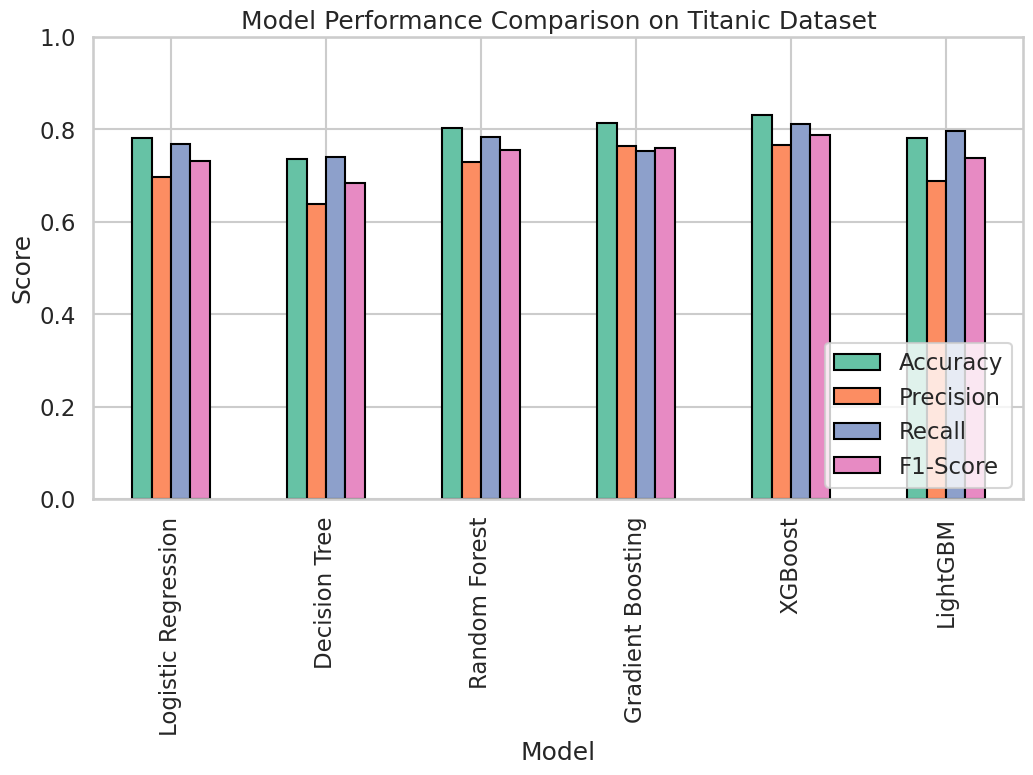

In [544]:
plt.figure(figsize=(12,6))
metrics_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score"]].plot(
    kind="bar", figsize=(12,6), edgecolor="black"
)
plt.title("Model Performance Comparison on Titanic Dataset")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation="vertical")
plt.legend(loc="lower right")
plt.show()


📊 Model Performance Summary

🔹 Best Overall Model

XGBoost

Highest Accuracy (83.1%)

Highest Recall (81.2%) → captures most survivors correctly

Best F1-Score (78.9%) → good balance between precision & recall

🔹 Runner-up

Gradient Boosting

Accuracy: 81.5%

Balanced precision & recall (both ~75%)

Slightly less than XGBoost but still strong.

🔹 Stable & Reliable

Random Forest

Accuracy: 80.3%

Precision: 73% (better than Logistic & LightGBM)

Good balance but weaker than XGBoost.

🔹 Decent Baseline

Logistic Regression

Accuracy: 78%

Good interpretability (simple model).

Slightly weaker precision compared to ensemble methods.

🔹 Weaker Models

Decision Tree

Accuracy: 73.6% (lowest)

Overfitting risk → weaker generalization.

LightGBM

Accuracy: 78% (same as Logistic Regression)

High recall (79.7%) but lower precision (68.8%) → predicts more survivors but with more false positives.



✅ Conclusion:

XGBoost is your best-performing model on this dataset.

Gradient Boosting & Random Forest are close competitors.

Logistic Regression still performs decently as a baseline.

Decision Tree is weakest.

LightGBM is recall-oriented (good for catching survivors but less precise)

#SAVING MODEL

In [545]:
import pickle


Save (Dump) a Model

In [546]:
# Save model to a file
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(XGB_model, f)


Load (Restore) the Model

In [547]:
# Load model from file
with open("xgboost_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


load titanic test csv

In [548]:
test=pd.read_csv("/content/test.csv")

In [549]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Create family-related features

In [550]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test["Family"] = test["FamilySize"].apply(lambda x: 0 if x == 1 else 1)

Make Predictions with Loaded Model

In [551]:
test_predictions = loaded_model.predict(test)

# submission file

In [552]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],       # original passenger IDs
    "Survived": test_predictions              # predictions from your model
})


In [553]:
submission.to_csv("submission.csv", index=False)


In [554]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
